# Tasks
- Data preparation and data cleaning
- EDA, feature importance analysis
- Model selection process and parameter tuning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

### Data preparation and data cleaning
- column names have the same format
- there are no string values

In [2]:
data = '../Data/heart.csv'
df = pd.read_csv(data)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
round(df.describe(), 3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [5]:
# number of unique values
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [6]:
# check null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# There is one duplicate record --> remove this
df.duplicated().sum()
# Output: 1
df = df.drop_duplicates()
df.duplicated().sum()

0

## EDA, feature importance analysis

#### Target variable analysis

<Axes: xlabel='output', ylabel='Count'>

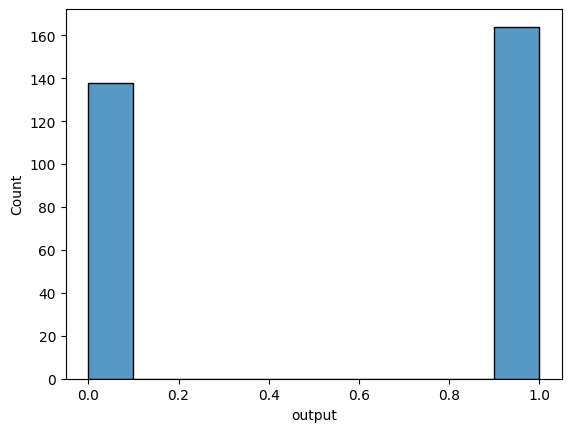

In [8]:
sns.histplot(df.output)

In [9]:
round(df.output.mean(), 3)

0.543

### Feature Importance

In [10]:
# Correlation
corr = df.corrwith(df.output)
abs(corr).sort_values(ascending=False)
#(corr).sort_values(ascending=False)

output      1.000000
exng        0.435601
cp          0.432080
oldpeak     0.429146
thalachh    0.419955
caa         0.408992
slp         0.343940
thall       0.343101
sex         0.283609
age         0.221476
trtbps      0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
dtype: float64

--> 'chol' and 'fbs' seems to be not as important as the others are...

<Axes: >

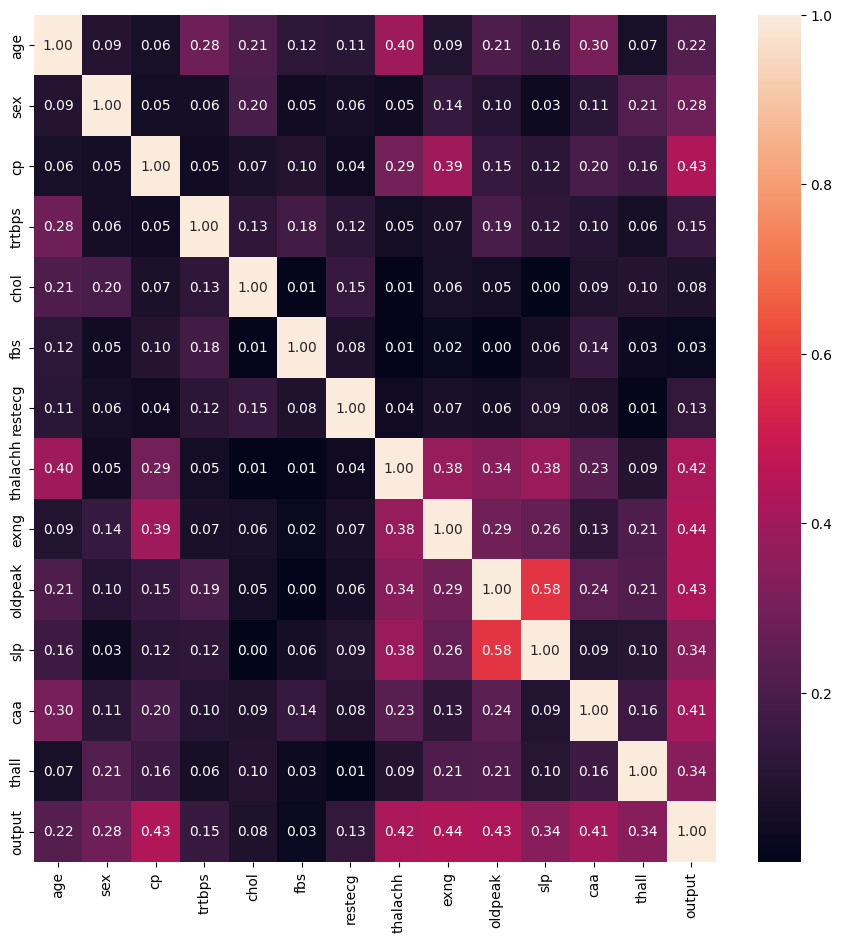

In [11]:
plt.figure(figsize=(11,11))
sns.heatmap(abs(df.corr()),fmt='.2f', annot=True)

In [12]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

In [13]:
df[categorical].nunique()

sex        2
cp         4
fbs        2
restecg    3
exng       2
slp        3
thall      4
dtype: int64

In [14]:
female_mean = df[df.sex == 0].output.mean()
female_mean
# Output: 0.75
male_mean = df[df.sex == 1].output.mean()
male_mean
# Output: 0.45

0.44660194174757284

## Data splitting

In [15]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()
df_copy = df_copy.sample(frac=1)

df_full_train, df_test = train_test_split(df_copy, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = (df_train.output).values
y_val = (df_val.output).values

del df_train['output']
del df_val['output']


In [16]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

#categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
#numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

## Training

### Logistic Regression

In [17]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

dv.get_feature_names_out()

array(['age', 'caa', 'chol', 'cp', 'exng', 'fbs', 'oldpeak', 'restecg',
       'sex', 'slp', 'thalachh', 'thall', 'trtbps'], dtype=object)

In [34]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_model_1 = LogisticRegression(solver='liblinear', random_state=1)
LogisticRegression_model_1.fit(X_train,y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = LogisticRegression_model_1.predict_proba(X_val)[:, 1]
y_pred

array([0.6431194 , 0.28699345, 0.15190832, 0.04521268, 0.6871288 ,
       0.385755  , 0.77875644, 0.9323919 , 0.78702254, 0.98656979,
       0.26981472, 0.26868081, 0.37262307, 0.73021849, 0.86965896,
       0.91340634, 0.90237771, 0.12987563, 0.02027259, 0.02058531,
       0.48434626, 0.94362747, 0.03977903, 0.6294972 , 0.07511782,
       0.03008493, 0.98330937, 0.80641933, 0.92768781, 0.16982169,
       0.83937962, 0.92373238, 0.20018206, 0.81232295, 0.3510785 ,
       0.7564227 , 0.09247464, 0.5924709 , 0.11610014, 0.9527704 ,
       0.62989684, 0.83657498, 0.91259354, 0.03202908, 0.42996454,
       0.17110623, 0.80382622, 0.96990679, 0.85998596, 0.92459197,
       0.81969484, 0.98251958, 0.76372206, 0.02017086, 0.01727975,
       0.48214408, 0.89671723, 0.05115406, 0.69373316, 0.64875263,
       0.9539776 ])

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Performance of LogisticRegression_model_1:

score = y_pred >= 0.5
acc_LogisticRegression_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_1)
# Output: 0.8688524590163934

#roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_1)
# Output: 0.901098901098901

acc:   0.86885
roc:   0.9011


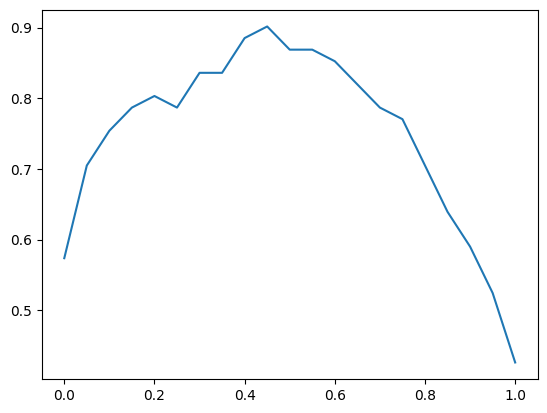

In [37]:
thresholds = np.linspace(0, 1, 21)
accuricies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuricies.append(acc)

plt.plot(thresholds, accuricies)

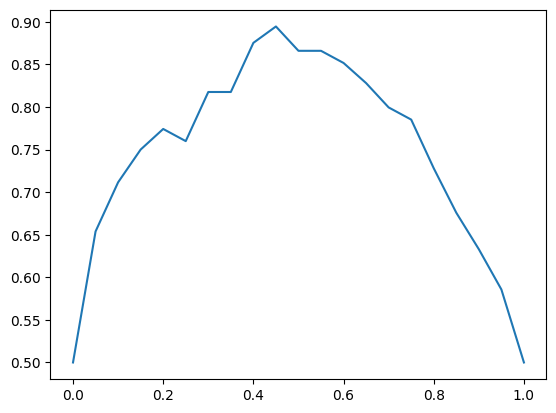

In [38]:
thresholds = np.linspace(0, 1, 21)
roc_auc_scores = []

for t in thresholds:
    score = roc_auc_score(y_val, y_pred >= t)
    roc_auc_scores.append(score)

plt.plot(thresholds, roc_auc_scores)

In [56]:
# setting threshold to 0.45 should be even a bit better than 0.5

# Performance of LogisticRegression_model_1:
score = y_pred >= 0.45
#accuracy_score(y_val, score)
acc_LogisticRegression_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_1)
# Output: 0.9016393442622951

roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_1)
# Output: 0.901098901098901

acc:   0.90164
roc:   0.9011


#### Logistic Regression - Different model (smaller)
- I've seen that 'chol' and 'fbs' seems to be not as important as the others, so let's try a smaller model without both.

In [59]:
categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

LogisticRegression_model_2 = LogisticRegression(solver='liblinear', random_state=1)
LogisticRegression_model_2.fit(X_train,y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = LogisticRegression_model_2.predict_proba(X_val)[:, 1]


# Performance of LogisticRegression_model_2:

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_LogisticRegression_model_2 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_2)
# Output: 0.9016393442622951

#roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_2 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_2)
# Output: 0.9076923076923077

acc:   0.90164
roc:   0.90769


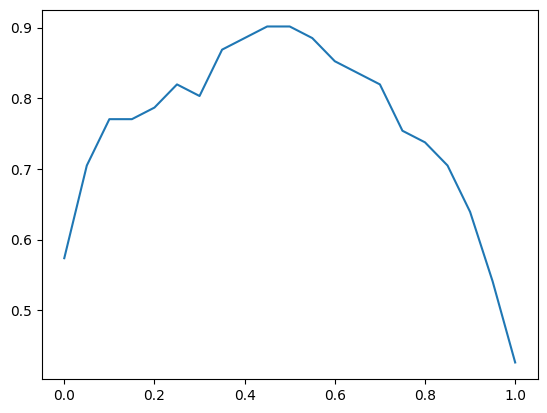

In [60]:
thresholds = np.linspace(0, 1, 21)
accuricies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuricies.append(acc)

plt.plot(thresholds, accuricies)

#### Logistic Regression - Different model (only 9 features)
- There are two more features with a lower importance, so let's try a smaller model without both.

In [62]:
categorical = ['sex', 'cp', 'exng', 'slp', 'thall']
numerical = ['age', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

LogisticRegression_model_3 = LogisticRegression(solver='liblinear', random_state=1)
LogisticRegression_model_3.fit(X_train,y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = LogisticRegression_model_3.predict_proba(X_val)[:, 1]

# Performance of LogisticRegression_model_3:

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_LogisticRegression_model_3 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_3)
# Output: 0.8688524590163934

#roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_3 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_3)
# Output: 0.901098901098901

acc:   0.86885
roc:   0.9011


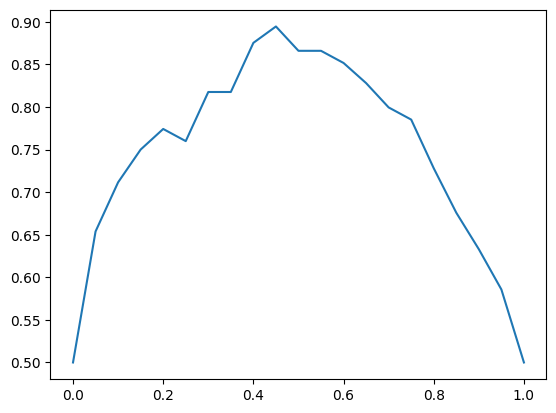

In [63]:
thresholds = np.linspace(0, 1, 21)
roc_auc_scores = []

for t in thresholds:
    score = roc_auc_score(y_val, y_pred >= t)
    roc_auc_scores.append(score)

plt.plot(thresholds, roc_auc_scores)

In [64]:
# setting threshold to 0.45 should be slightly better than 0.5
score = y_pred >= 0.45
#accuracy_score(y_val, score)
acc_LogisticRegression_model_3 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_LogisticRegression_model_3)
# Output: 0.9016393442622951

#roc_auc_score(y_val, y_pred)
roc_LogisticRegression_model_3 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_LogisticRegression_model_3)
# Output: 0.901098901098901

acc:   0.90164
roc:   0.9011


#### Logistic Regression - Parameter tuning (K-fold cross-validation)
I'll go with the second model and do some parameter tuning.

#### Tuning the C-value

In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']
#categorical = ['sex', 'cp', 'exng', 'slp', 'thall']
#numerical = ['age', 'thalachh', 'oldpeak', 'caa']
features = categorical + numerical

def train(df_train, y_train, C):
    train_dict = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', random_state=1, C=C)
    model.fit(X_train,y_train)

    return dv, model

def predict(df_pred, dv, model):
    pred_dict = df_pred[features].to_dict(orient='records')
    X_pred = dv.transform(pred_dict)
    y_pred = model.predict_proba(X_pred)[:, 1]

    return y_pred
    

In [66]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.4, 0.5, 0.6, 1, 5, 10]:
    auc_scores = []
    accuracies = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.output.values
        y_val = df_val.output.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc_score = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc_score)

        score = y_pred >= 0.5
        accuracy = accuracy_score(y_val, score)
        accuracies.append(accuracy)
    
    print('C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))


C=0.001, auc_score=0.748 +- 0.053, accuracy=0.677 +- 0.076
C=0.01, auc_score=0.845 +- 0.046, accuracy=0.780 +- 0.076
C=0.1, auc_score=0.895 +- 0.031, accuracy=0.838 +- 0.064
C=0.4, auc_score=0.901 +- 0.035, accuracy=0.834 +- 0.053
C=0.5, auc_score=0.900 +- 0.035, accuracy=0.838 +- 0.047
C=0.6, auc_score=0.899 +- 0.035, accuracy=0.838 +- 0.047
C=1, auc_score=0.900 +- 0.036, accuracy=0.842 +- 0.054
C=5, auc_score=0.903 +- 0.037, accuracy=0.842 +- 0.045
C=10, auc_score=0.901 +- 0.039, accuracy=0.838 +- 0.043


The following configuration seems to be the best:
- C=5, auc_score=0.903 +- 0.037, accuracy=0.842 +- 0.045
- C=10, auc_score=0.901 +- 0.039, accuracy=0.838 +- 0.043
- C=0.4, auc_score=0.901 +- 0.035, accuracy=0.834 +- 0.053
- C=0.5, auc_score=0.900 +- 0.035, accuracy=0.838 +- 0.047

#### Tuning the number of folds

In [67]:
nfolds = 10
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.4, 0.5, 0.6, 1, 5, 10]:
    auc_scores = []
    accuracies = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.output.values
        y_val = df_val.output.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc_score = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc_score)

        score = y_pred >= 0.5
        accuracy = accuracy_score(y_val, score)
        accuracies.append(accuracy)
    
    print('C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))

C=0.001, auc_score=0.754 +- 0.119, accuracy=0.685 +- 0.099
C=0.01, auc_score=0.852 +- 0.085, accuracy=0.768 +- 0.077
C=0.1, auc_score=0.906 +- 0.049, accuracy=0.838 +- 0.069
C=0.4, auc_score=0.911 +- 0.043, accuracy=0.842 +- 0.062
C=0.5, auc_score=0.913 +- 0.041, accuracy=0.838 +- 0.061
C=0.6, auc_score=0.913 +- 0.041, accuracy=0.846 +- 0.059
C=1, auc_score=0.912 +- 0.041, accuracy=0.850 +- 0.063
C=5, auc_score=0.910 +- 0.042, accuracy=0.842 +- 0.059
C=10, auc_score=0.910 +- 0.043, accuracy=0.838 +- 0.058


In [68]:
for nfold in [2, 3, 5, 7, 9, 10, 15, 20]:
    kfold = KFold(n_splits=nfold, shuffle=True, random_state=1)

    for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
        auc_scores = []
        accuracies = []

        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train.output.values
            y_val = df_val.output.values

            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)

            auc_score = roc_auc_score(y_val, y_pred)
            auc_scores.append(auc_score)

            score = y_pred >= 0.5
            accuracy = accuracy_score(y_val, score)
            accuracies.append(accuracy)
        
        print('nfold=%s, C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (nfold, C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))

nfold=2, C=0.001, auc_score=0.745 +- 0.043, accuracy=0.676 +- 0.043
nfold=2, C=0.01, auc_score=0.824 +- 0.050, accuracy=0.755 +- 0.055
nfold=2, C=0.1, auc_score=0.894 +- 0.027, accuracy=0.826 +- 0.042
nfold=2, C=0.5, auc_score=0.904 +- 0.016, accuracy=0.826 +- 0.034
nfold=2, C=1, auc_score=0.903 +- 0.013, accuracy=0.821 +- 0.038
nfold=2, C=5, auc_score=0.904 +- 0.011, accuracy=0.821 +- 0.038
nfold=2, C=10, auc_score=0.904 +- 0.011, accuracy=0.826 +- 0.034
nfold=3, C=0.001, auc_score=0.750 +- 0.069, accuracy=0.668 +- 0.072
nfold=3, C=0.01, auc_score=0.836 +- 0.065, accuracy=0.772 +- 0.066
nfold=3, C=0.1, auc_score=0.900 +- 0.029, accuracy=0.830 +- 0.083
nfold=3, C=0.5, auc_score=0.905 +- 0.017, accuracy=0.830 +- 0.057
nfold=3, C=1, auc_score=0.905 +- 0.016, accuracy=0.834 +- 0.053
nfold=3, C=5, auc_score=0.904 +- 0.015, accuracy=0.834 +- 0.051
nfold=3, C=10, auc_score=0.904 +- 0.014, accuracy=0.830 +- 0.048
nfold=5, C=0.001, auc_score=0.748 +- 0.053, accuracy=0.677 +- 0.076
nfold=5, C=0

Best folds:
- nfold=20, C=0.5, auc_score=0.914 +- 0.061, accuracy=0.842 +- 0.091
- nfold=10, C=0.5, auc_score=0.913 +- 0.041, accuracy=0.838 +- 0.061
- nfold=9, C=0.5, auc_score=0.911 +- 0.042, accuracy=0.838 +- 0.055

#### Tuning max_iter

In [69]:
def train(df_train, y_train, C, max_iter, n_jobs=-1):
    train_dict = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', random_state=1, C=C, max_iter=max_iter, n_jobs=n_jobs)
    model.fit(X_train,y_train)

    return dv, model

In [71]:
for max_i in [50, 100, 250, 500, 1000, 5000, 10000]:
    for nfold in [9, 10, 20]:
        kfold = KFold(n_splits=nfold, shuffle=True, random_state=1)

        for C in [0.5]:
            auc_scores = []
            accuracies = []

            for train_idx, val_idx in kfold.split(df_full_train):
                df_train = df_full_train.iloc[train_idx]
                df_val = df_full_train.iloc[val_idx]

                y_train = df_train.output.values
                y_val = df_val.output.values

                dv, model = train(df_train, y_train, C=C, max_iter=max_i, n_jobs=1)
                y_pred = predict(df_val, dv, model)

                auc_score = roc_auc_score(y_val, y_pred)
                auc_scores.append(auc_score)

                score = y_pred >= 0.5
                accuracy = accuracy_score(y_val, score)
                accuracies.append(accuracy)
            
            print('max_iter=%s, nfold=%s, C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (max_i, nfold, C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))

max_iter=50, nfold=9, C=0.5, auc_score=0.911 +- 0.042, accuracy=0.838 +- 0.055
max_iter=50, nfold=10, C=0.5, auc_score=0.913 +- 0.041, accuracy=0.838 +- 0.061
max_iter=50, nfold=20, C=0.5, auc_score=0.914 +- 0.061, accuracy=0.842 +- 0.091
max_iter=100, nfold=9, C=0.5, auc_score=0.911 +- 0.042, accuracy=0.838 +- 0.055
max_iter=100, nfold=10, C=0.5, auc_score=0.913 +- 0.041, accuracy=0.838 +- 0.061
max_iter=100, nfold=20, C=0.5, auc_score=0.914 +- 0.061, accuracy=0.842 +- 0.091
max_iter=250, nfold=9, C=0.5, auc_score=0.911 +- 0.042, accuracy=0.838 +- 0.055
max_iter=250, nfold=10, C=0.5, auc_score=0.913 +- 0.041, accuracy=0.838 +- 0.061
max_iter=250, nfold=20, C=0.5, auc_score=0.914 +- 0.061, accuracy=0.842 +- 0.091
max_iter=500, nfold=9, C=0.5, auc_score=0.911 +- 0.042, accuracy=0.838 +- 0.055
max_iter=500, nfold=10, C=0.5, auc_score=0.913 +- 0.041, accuracy=0.838 +- 0.061
max_iter=500, nfold=20, C=0.5, auc_score=0.914 +- 0.061, accuracy=0.842 +- 0.091
max_iter=1000, nfold=9, C=0.5, auc_

In [74]:
kfold = KFold(n_splits=20, shuffle=True, random_state=1)
max_i = 50
C = 0.5

auc_scores = []
accuracies = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.output.values
    y_val = df_val.output.values

    dv, model = train(df_train, y_train, C=C, max_iter=max_i, n_jobs=1)
    y_pred = predict(df_val, dv, model)

    auc_score = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc_score)

    score = y_pred >= 0.5
    accuracy = accuracy_score(y_val, score)
    accuracies.append(accuracy)
                
print('max_iter=%s, nfold=%s, C=%s, auc_score=%0.3f +- %0.3f, accuracy=%0.3f +- %0.3f' % (max_i, nfold, C, np.mean(auc_scores), np.std(auc_scores), np.mean(accuracies), np.std(accuracies)))        

max_iter=50, nfold=20, C=0.5, auc_score=0.914 +- 0.061, accuracy=0.842 +- 0.091


### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

dt_1 = DecisionTreeClassifier(random_state=1)
dt_1.fit(X_train, y_train)
y_pred = dt_1.predict_proba(X_val)[:,1]

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_DecisionTree_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_DecisionTree_model_1)
# Output: 0.83333

#roc_auc_score(y_val, y_pred)
roc_DecisionTree_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_DecisionTree_model_1)
# Output: 0.85714

acc:   0.83333
roc:   0.85714


#### Decision Tree - Tuning

In [77]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt_2 = DecisionTreeClassifier(max_depth=depth)

    dt_2.fit(X_train, y_train)
    y_pred = dt_2.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, auc))


   1 -> 0.757
   2 -> 0.843
   3 -> 0.929
   4 -> 0.929
   5 -> 0.929
   6 -> 0.914
  10 -> 0.743
  15 -> 0.786
  20 -> 0.786
None -> 0.857


In [78]:
for depth in [3, 4, 5]:
    print('depth: %s' % depth)
    for min_samples in [1, 5, 10, 15, 20, 50, 100]:
        dt_2 = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples)

        dt_2.fit(X_train, y_train)
        y_pred = dt_2.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        print('%4s -> %.3f' % (min_samples, auc))

depth: 3
   1 -> 0.929
   5 -> 0.929
  10 -> 0.929
  15 -> 0.929
  20 -> 0.871
  50 -> 0.757
 100 -> 0.757
depth: 4
   1 -> 0.929
   5 -> 0.886
  10 -> 0.943
  15 -> 0.929
  20 -> 0.871
  50 -> 0.757
 100 -> 0.757
depth: 5
   1 -> 0.871
   5 -> 0.886
  10 -> 0.943
  15 -> 0.929
  20 -> 0.871
  50 -> 0.757
 100 -> 0.757


In [79]:
dt_3 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

dt_3.fit(X_train, y_train)
y_pred = dt_3.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.9428571428571428

### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

rf_1 = RandomForestClassifier(n_estimators=3, random_state=1)
rf_1.fit(X_train, y_train)

y_pred = rf_1.predict_proba(X_val)[:,1]

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_RandomForest_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_RandomForest_model_1)
# Output: 0.91667

#roc_auc_score(y_val, y_pred)
roc_RandomForest_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_RandomForest_model_1)
# Output: 0.98571

acc:   0.91667
roc:   0.98571


#### Random Forest - Tuning

depth: 5
10 -> 0.886
20 -> 0.971
30 -> 1.000
40 -> 1.000
50 -> 1.000
60 -> 1.000
70 -> 1.000
80 -> 1.000
90 -> 1.000
100 -> 1.000
110 -> 1.000
120 -> 1.000
130 -> 1.000
140 -> 1.000
150 -> 1.000
160 -> 1.000
170 -> 1.000
180 -> 1.000
190 -> 1.000
200 -> 1.000

depth: 10
10 -> 1.000
20 -> 1.000
30 -> 1.000
40 -> 1.000
50 -> 1.000
60 -> 1.000
70 -> 1.000
80 -> 1.000
90 -> 1.000
100 -> 1.000
110 -> 1.000
120 -> 1.000
130 -> 1.000
140 -> 1.000
150 -> 1.000
160 -> 1.000
170 -> 1.000
180 -> 1.000
190 -> 1.000
200 -> 1.000

depth: 20
10 -> 1.000
20 -> 1.000
30 -> 1.000
40 -> 1.000
50 -> 1.000
60 -> 1.000
70 -> 1.000
80 -> 1.000
90 -> 1.000
100 -> 1.000
110 -> 1.000
120 -> 1.000
130 -> 1.000
140 -> 1.000
150 -> 1.000
160 -> 1.000
170 -> 1.000
180 -> 1.000
190 -> 1.000
200 -> 1.000



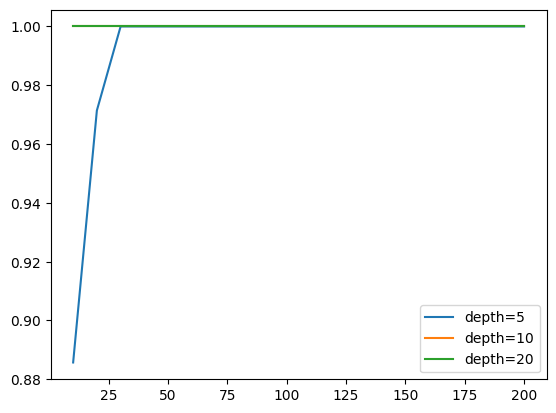

In [87]:
auc_scores = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    auc_scores[depth] = aucs
    print()

num_trees = list(range(10, 201, 10))
plt.plot(num_trees, auc_scores[5], label='depth=5')
plt.plot(num_trees, auc_scores[10], label='depth=10')
plt.plot(num_trees, auc_scores[20], label='depth=20')
plt.legend()

min_samples: 3
10 -> 0.914
20 -> 1.000
30 -> 1.000
40 -> 1.000
50 -> 1.000
60 -> 1.000
70 -> 1.000
80 -> 1.000
90 -> 1.000
100 -> 1.000
110 -> 1.000
120 -> 1.000
130 -> 1.000
140 -> 1.000
150 -> 1.000
160 -> 1.000
170 -> 1.000
180 -> 1.000
190 -> 1.000
200 -> 1.000

min_samples: 5
10 -> 0.971
20 -> 1.000
30 -> 1.000
40 -> 1.000
50 -> 1.000
60 -> 1.000
70 -> 1.000
80 -> 1.000
90 -> 1.000
100 -> 1.000
110 -> 1.000
120 -> 1.000
130 -> 1.000
140 -> 1.000
150 -> 1.000
160 -> 1.000
170 -> 1.000
180 -> 1.000
190 -> 1.000
200 -> 1.000

min_samples: 10
10 -> 0.943
20 -> 0.971
30 -> 0.971
40 -> 1.000
50 -> 1.000
60 -> 1.000
70 -> 1.000
80 -> 1.000
90 -> 1.000
100 -> 1.000
110 -> 1.000
120 -> 1.000
130 -> 1.000
140 -> 1.000
150 -> 1.000
160 -> 1.000
170 -> 1.000
180 -> 1.000
190 -> 1.000
200 -> 1.000



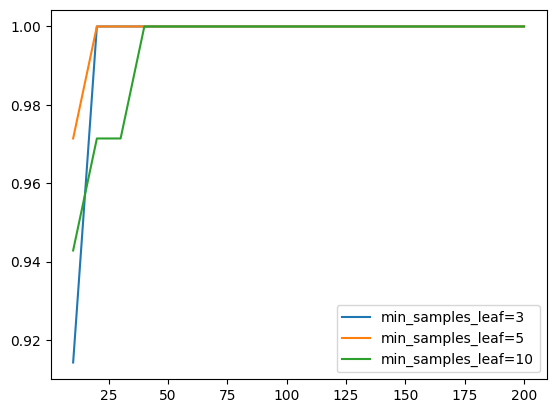

In [88]:
auc_scores = {}

for min_samples in [3, 5, 10]:
    print('min_samples: %s' % min_samples)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=5, min_samples_leaf=min_samples, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    auc_scores[min_samples] = aucs
    print()

num_trees = list(range(10, 201, 10))
plt.plot(num_trees, auc_scores[3], label='min_samples_leaf=3')
plt.plot(num_trees, auc_scores[5], label='min_samples_leaf=5')
plt.plot(num_trees, auc_scores[10], label='min_samples_leaf=10')
plt.legend()

#### Random Forest - Best model

In [89]:
rf_2 = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=5, random_state=1)
rf_2.fit(X_train, y_train)

y_pred = rf_2.predict_proba(X_val)[:,1]

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_RandomForest_model_2 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_RandomForest_model_2)
# Output: 0.83333

#roc_auc_score(y_val, y_pred)
roc_RandomForest_model_2 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_RandomForest_model_2)
# Output: 0.97143

acc:   0.83333
roc:   0.97143


### XGBoost

In [90]:
#!pip install xgboost
import xgboost as xgb

categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': -1,
    'seed': 1,
    'silent': 1
}

xgb_model_1 = xgb.train(xgb_params, dtrain, num_boost_round=10)

y_pred = xgb_model_1.predict(dval)

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_xgb_model_1 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_xgb_model_1)
# Output: 0.91667

#roc_auc_score(y_val, y_pred)
roc_xgb_model_1 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_xgb_model_1)
# Output: 0.97143

acc:   0.91667
roc:   0.97143


/Users/erni/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [13:24:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


#### XGBoost - Tuning

In [97]:
scores = {}

In [98]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [93]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': -1,
    'seed': 1,
    'silent': 1
}

xgb_model_2 = xgb.train(xgb_params, dtrain, 
                  num_boost_round=101,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.94700	val-auc:0.95714
[10]	train-auc:0.99877	val-auc:0.97143
[20]	train-auc:1.00000	val-auc:0.97143
[30]	train-auc:1.00000	val-auc:0.97143
[40]	train-auc:1.00000	val-auc:0.97143
[50]	train-auc:1.00000	val-auc:0.97143
[60]	train-auc:1.00000	val-auc:0.97143
[70]	train-auc:1.00000	val-auc:0.97143
[80]	train-auc:1.00000	val-auc:0.97143
[90]	train-auc:1.00000	val-auc:0.97143
[100]	train-auc:1.00000	val-auc:0.97143


/Users/erni/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [13:26:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [99]:
%%capture output
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': -1,
    'seed': 1,
    'silent': 1
}

xgb_model_2 = xgb.train(xgb_params, dtrain, 
                  num_boost_round=101,
                  evals=watchlist, verbose_eval=10)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

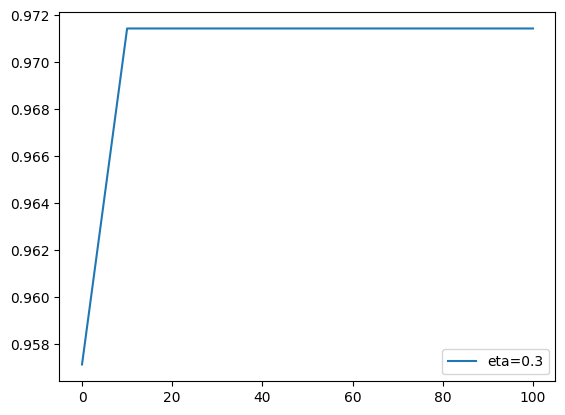

In [100]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

##### XGBoost - Tuning eta

In [108]:
scores = {}

In [109]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [110]:
%%capture output

xgb_params = {
    'eta': 1.0,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [111]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [112]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [113]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': -1,
    'seed': 1,
    'verbosity': 1
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

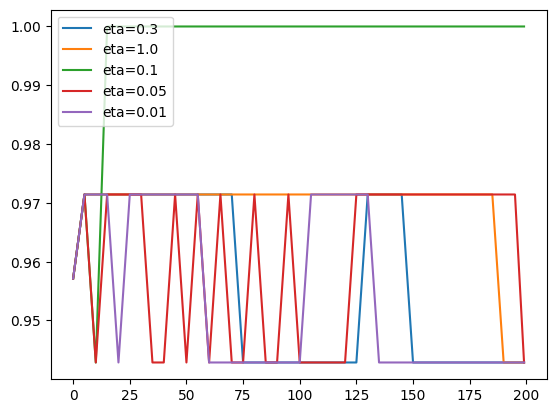

In [114]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

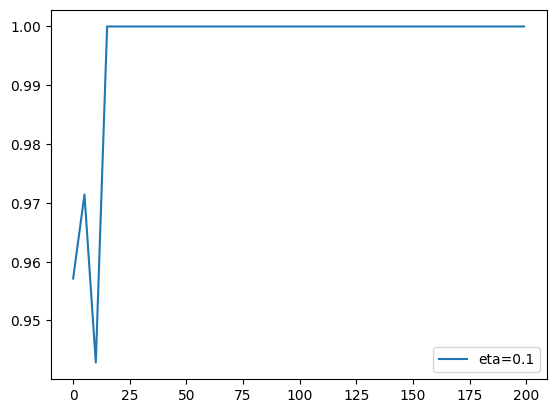

In [115]:
etas = ['eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

eta=0.1 seems to be the best. We take this as set value and tune the next one.

##### XGBoost - Tuning max_depth

In [116]:
scores = {}

In [117]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [118]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [119]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [120]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_3 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

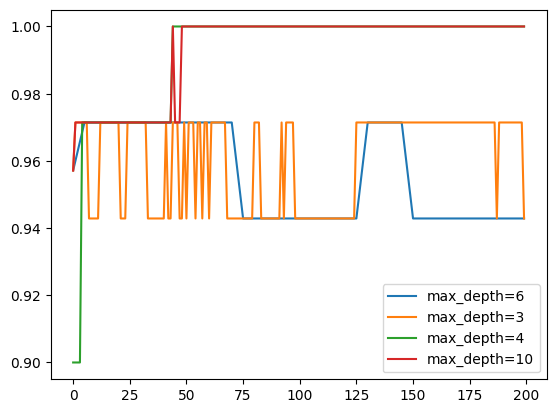

In [121]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

#plt.ylim(0.8, 0.84)
plt.legend()

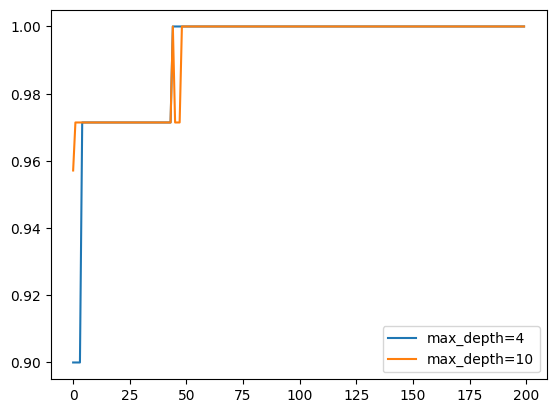

In [122]:
max_depths = ['max_depth=4', 'max_depth=10']
for max_depth in max_depths:
    df_score = scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()

max_depth=4 and max_depth=10 are looking quite similar. Let's go with max_depth=4 because it's the easier one.

##### XGBoost - Tuning min_child_weight

In [126]:
scores = {}

In [127]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [128]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [129]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=1,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

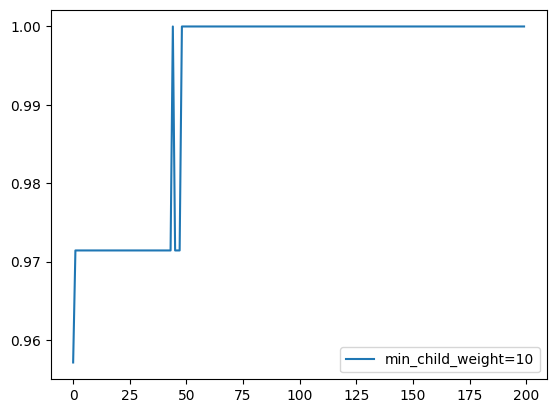

In [131]:
#min_child_weights = ['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30']
min_child_weights = ['min_child_weight=10']
for min_child_weight in min_child_weights:
    df_score = scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.legend()

In [132]:
categorical = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
numerical = ['age', 'trtbps', 'thalachh', 'oldpeak', 'caa']

dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

xgb_model_5 = xgb.train(xgb_params, dtrain, num_boost_round=61,evals=watchlist,
                  verbose_eval=1)

[0]	train-auc:0.85599	val-auc:0.84286
[1]	train-auc:0.85599	val-auc:0.84286
[2]	train-auc:0.87296	val-auc:0.84286
[3]	train-auc:0.88487	val-auc:0.90000
[4]	train-auc:0.90553	val-auc:1.00000
[5]	train-auc:0.90768	val-auc:1.00000
[6]	train-auc:0.91897	val-auc:1.00000
[7]	train-auc:0.91690	val-auc:1.00000
[8]	train-auc:0.91886	val-auc:1.00000
[9]	train-auc:0.91793	val-auc:1.00000
[10]	train-auc:0.92116	val-auc:1.00000
[11]	train-auc:0.92761	val-auc:1.00000
[12]	train-auc:0.92911	val-auc:1.00000
[13]	train-auc:0.93164	val-auc:1.00000
[14]	train-auc:0.93134	val-auc:1.00000
[15]	train-auc:0.93545	val-auc:1.00000
[16]	train-auc:0.93522	val-auc:1.00000
[17]	train-auc:0.93660	val-auc:1.00000
[18]	train-auc:0.93683	val-auc:1.00000
[19]	train-auc:0.93944	val-auc:1.00000
[20]	train-auc:0.93829	val-auc:1.00000
[21]	train-auc:0.93806	val-auc:1.00000
[22]	train-auc:0.93917	val-auc:1.00000
[23]	train-auc:0.94071	val-auc:1.00000
[24]	train-auc:0.94025	val-auc:1.00000
[25]	train-auc:0.94117	val-auc:1.00

In [139]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': -1,
    'seed': 1,
    'silent': 1
}

xgb_model_6 = xgb.train(xgb_params, dtrain, 
                  num_boost_round=34,
                  evals=watchlist, verbose_eval=1)

[0]	train-auc:0.85599	val-auc:0.84286
[1]	train-auc:0.85599	val-auc:0.84286
[2]	train-auc:0.87296	val-auc:0.84286
[3]	train-auc:0.88487	val-auc:0.90000
[4]	train-auc:0.90553	val-auc:1.00000
[5]	train-auc:0.90768	val-auc:1.00000
[6]	train-auc:0.91897	val-auc:1.00000
[7]	train-auc:0.91690	val-auc:1.00000
[8]	train-auc:0.91886	val-auc:1.00000
[9]	train-auc:0.91793	val-auc:1.00000
[10]	train-auc:0.92116	val-auc:1.00000
[11]	train-auc:0.92761	val-auc:1.00000
[12]	train-auc:0.92911	val-auc:1.00000
[13]	train-auc:0.93164	val-auc:1.00000
[14]	train-auc:0.93134	val-auc:1.00000
[15]	train-auc:0.93545	val-auc:1.00000
[16]	train-auc:0.93522	val-auc:1.00000
[17]	train-auc:0.93660	val-auc:1.00000
[18]	train-auc:0.93683	val-auc:1.00000
[19]	train-auc:0.93944	val-auc:1.00000
[20]	train-auc:0.93829	val-auc:1.00000
[21]	train-auc:0.93806	val-auc:1.00000
[22]	train-auc:0.93917	val-auc:1.00000
[23]	train-auc:0.94071	val-auc:1.00000
[24]	train-auc:0.94025	val-auc:1.00000
[25]	train-auc:0.94117	val-auc:1.00

/Users/erni/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [13:44:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [142]:
y_pred = xgb_model_6.predict(dval)

score = y_pred >= 0.5
#accuracy_score(y_val, score)
acc_xgb_model_6 = round(accuracy_score(y_val, score), 5)
print("acc:  ",acc_xgb_model_6)
# Output: 0.8333333333333334

#roc_auc_score(y_val, y_pred)
roc_xgb_model_6 = round(roc_auc_score(y_val, y_pred), 5)
print("roc:  ",roc_xgb_model_6)
# Output: 0.9714285714285714


acc:   0.83333
roc:   0.97143


## Selecting the best model

### Logistic Regression:

- LogisticRegression_model_1
    acc:   0.90164
    roc:   0.9011

- LogisticRegression_model_2
    acc:   0.90164
    roc:   0.90769

- LogisticRegression_model_3
    acc:   0.90164
    roc:   0.9011

- K-Fold:
    auc_score:  0.914

### Decision Tree:

- dt_3
    auc_score:  0.9428571428571428


### Random Forest:

- rf_2
    acc:   0.83333
    roc:   0.97143

### XGBoost model:

- xgb_model_1
    acc:   0.91667
    roc:   0.97143

- xgb_model_6
    acc:   0.83333
    roc:   0.97143

### DecisionTree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

roc_auc_score(y_val, y_pred)
Output: 0.9841269841269842

### Random Forest:

RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=3, random_state=1)

accuracy_score(y_val, score)
Output: 0.9375

roc_auc_score(y_val, y_pred)
Output: 0.9841269841269841

### XGBoost:

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': -1,
    'seed': 1,
    'silent': 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=11,
                  evals=watchlist, verbose_eval=10)

accuracy_score(y_val, score)
Output: 0.9375

roc_auc_score(y_val, y_pred)
Output: 0.9841269841269842

In [ ]:
# Selecting the best model
# Retrain the best model on full_train
# Save the model
# Provide python files
# Deploy the model to web server
# Use Docker